In [17]:
from experiments.utilities import get_subject_id_to_patient_info

info = get_subject_id_to_patient_info("medcat")

In [18]:
conditions = [c for p in info.values() for c in p.CONDITIONS]

from collections import Counter 

c = Counter(conditions)

<AxesSubplot:ylabel='count'>

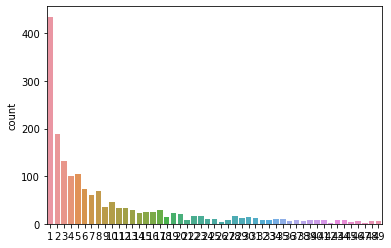

In [19]:
import seaborn as sns

c = {k:v for k, v in c.items() if v < 50}
sns.countplot(list(c.values()))

In [10]:
import pandas as pd 

df = pd.read_csv("setup_outputs/ICD9_Descriptions.csv")

In [1]:
from experiments.utilities import get_condition_code_to_count

counts = get_condition_code_to_count("icd9")

In [12]:
df["count"] = df["CODE"].apply(lambda x : counts[x] if x in counts else 0)

In [13]:
df["length"] = df["DESCRIPTION"].apply(len)
df = df[df["count"] > 0]

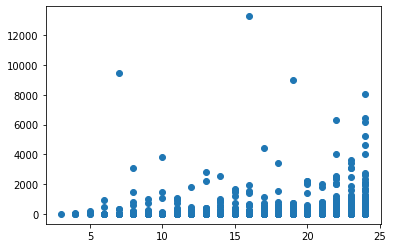

In [14]:
import matplotlib.pyplot as plt 

plt.scatter(df["length"], df["count"]) 

In [15]:
from scipy.stats import spearmanr
spearmanr(df["length"], df["count"])

SpearmanrResult(correlation=-0.03972696447048526, pvalue=0.0018423122560312498)